In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from sklearn.metrics import silhouette_score

In [137]:
df = pd.read_csv('clustering.csv')
df = df.drop(columns=['lon','lat'])
df

,PSurf_Autumn,Qair_Autumn,Qair_Summer,Rainf_Autumn,Rainf_Spring,Rainf_Summer,Rainf_Winter,Snowf_Autumn,Snowf_Spring,Snowf_Summer,...,silt % topsoil,clay % topsoil,pH water topsoil,OC % topsoil,OC % subsoil,N % topsoil,N % subsoil,CEC topsoil,CaCO3 % topsoil,C/N topsoil
0,0.651271,0.338749,0.560976,0.461928,0.551354,0.553272,0.550900,0.0,1.199759e-08,0.0,...,0.497844,0.542537,0.645066,0.557730,0.423372,0.347541,0.248120,0.602114,0.186310,0.509915
1,0.644339,0.321047,0.557381,0.490363,0.695905,0.445368,0.629107,0.0,0.000000e+00,0.0,...,0.427986,0.453912,0.740795,0.451649,0.331418,0.327869,0.108486,0.455532,0.624464,0.550385
2,0.608045,0.284337,0.514502,0.406324,0.585059,0.638056,0.669368,0.0,0.000000e+00,0.0,...,0.427986,0.453912,0.740795,0.451649,0.331418,0.327869,0.108486,0.455532,0.624464,0.550385
3,0.647045,0.203000,0.361061,0.453268,0.532347,0.489054,0.362207,0.0,0.000000e+00,0.0,...,0.436179,0.615022,0.670103,0.680627,0.555555,0.675410,0.516649,0.505708,0.291988,0.550385
4,0.687171,0.328496,0.482762,0.538057,0.710999,0.322815,0.215000,0.0,0.000000e+00,0.0,...,0.436179,0.615022,0.670103,0.680627,0.555555,0.675410,0.516649,0.505708,0.291988,0.550385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849,0.281168,0.336218,0.339859,0.081334,0.441183,0.308626,0.732030,0.0,0.000000e+00,0.0,...,0.479086,0.730646,0.773196,0.292529,0.295019,0.491803,0.505908,0.516984,0.514325,0.485633
850,0.266920,0.343054,0.395944,0.295022,0.573730,0.163909,0.602950,0.0,0.000000e+00,0.0,...,0.109961,0.259053,0.104566,0.430951,0.162835,0.360656,0.001074,0.186046,0.000686,0.161878
851,0.322679,0.393226,0.410108,0.333354,0.552432,0.263711,0.670926,0.0,0.000000e+00,0.0,...,0.109961,0.259053,0.104566,0.430951,0.162835,0.360656,0.001074,0.186046,0.000686,0.161878
852,0.390727,0.405105,0.378667,0.413955,0.678861,0.245565,0.616733,0.0,0.000000e+00,0.0,...,0.495903,0.621478,0.715758,0.230433,0.220307,0.590164,0.538131,0.383369,0.448447,0.364225


In [138]:
df.columns

Index(['PSurf_Autumn', 'Qair_Autumn', 'Qair_Summer', 'Rainf_Autumn',
       'Rainf_Spring', 'Rainf_Summer', 'Rainf_Winter', 'Snowf_Autumn',
       'Snowf_Spring', 'Snowf_Summer', 'Snowf_Winter', 'Tair_Autumn',
       'Tair_Summer', 'Wind_Autumn', 'Wind_Spring', 'Wind_Summer',
       'Wind_Winter', 'sand % topsoil', 'silt % topsoil', 'clay % topsoil',
       'pH water topsoil', 'OC % topsoil', 'OC % subsoil', 'N % topsoil',
       'N % subsoil', 'CEC topsoil', 'CaCO3 % topsoil', 'C/N topsoil'],
      dtype='object')

# CALARANS

In [5]:
import pandas as pd
import numpy as np
import random

# Function to calculate the total cost (sum of distances)
def calculate_total_cost(data, medoids):
    total_cost = 0
    for _, row in data.iterrows():
        min_distance = min(np.linalg.norm(row.values - medoid) for medoid in medoids)
        total_cost += min_distance
    return total_cost

# Function to assign clusters based on medoids
def assign_clusters(data, medoids):
    clusters = {i: [] for i in range(len(medoids))}
    for idx, row in data.iterrows():
        distances = [np.linalg.norm(row.values - medoid) for medoid in medoids]
        nearest_medoid = np.argmin(distances)
        clusters[nearest_medoid].append(idx)
    return clusters

# CLARANS implementation
def clarans(data, k, numlocal, maxneighbor):
    best_medoids = None
    best_cost = float('inf')

    for _ in range(numlocal):
        # Initialize random medoids
        medoids_indices = random.sample(range(len(data)), k)
        medoids = data.iloc[medoids_indices].values
        current_cost = calculate_total_cost(data, medoids)

        for _ in range(maxneighbor):
            # Randomly select a medoid to swap
            medoid_idx = random.choice(range(k))
            non_medoid_indices = [i for i in range(len(data)) if i not in medoids_indices]
            new_medoid_index = random.choice(non_medoid_indices)

            # Swap medoid
            new_medoids = medoids.copy()
            new_medoids[medoid_idx] = data.iloc[new_medoid_index].values

            # Calculate the new cost
            new_cost = calculate_total_cost(data, new_medoids)

            # If new configuration is better, update medoids and cost
            if new_cost < current_cost:
                medoids = new_medoids
                medoids_indices[medoid_idx] = new_medoid_index
                current_cost = new_cost

        # Keep track of the best configuration
        if current_cost < best_cost:
            best_medoids = medoids
            best_cost = current_cost

    # Assign data points to the nearest medoid
    clusters = assign_clusters(data, best_medoids)

    return best_medoids, clusters

# Example usage



# DBSCAN

In [122]:
import pandas as pd
import numpy as np
from collections import deque

def dbscan(data, eps, min_samples):
  
    n = len(data)
    labels = [-1] * n  # Initialize all points as noise (-1)
    cluster_id = 0

    def region_query(point_idx):
        """Find all points within `eps` distance of `point_idx`."""
        neighbors = []
        for idx, row in data.iterrows():
            if np.linalg.norm(data.iloc[point_idx].values - row.values) <= eps:
                neighbors.append(idx)
        return neighbors

    def expand_cluster(point_idx, neighbors):
        """Expand the cluster starting from `point_idx`."""
        nonlocal cluster_id
        labels[point_idx] = cluster_id
        queue = deque(neighbors)
        while queue:
            current_idx = queue.popleft()
            if labels[current_idx] == -1:  # Previously marked as noise
                labels[current_idx] = cluster_id
            if labels[current_idx] != -1:  # Already processed
                continue
            labels[current_idx] = cluster_id
            current_neighbors = region_query(current_idx)
            if len(current_neighbors) >= min_samples:
                queue.extend(current_neighbors)

    for point_idx in range(n):
        if labels[point_idx] != -1:  # Already processed
            continue

        neighbors = region_query(point_idx)
        if len(neighbors) < min_samples:
            labels[point_idx] = -1  # Mark as noise
        else:
            cluster_id += 1
            expand_cluster(point_idx, neighbors)

    return labels




# PCA

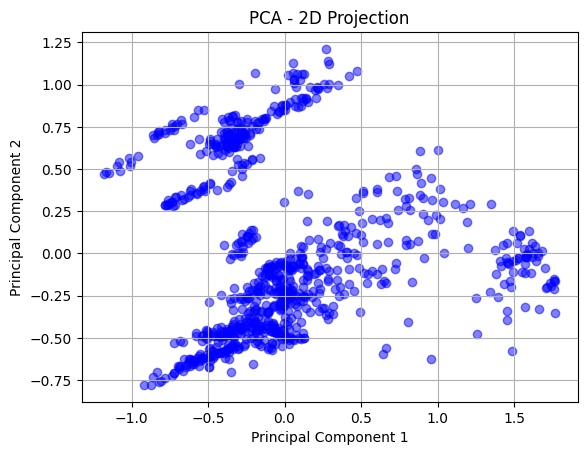

In [139]:
def pca():
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(df)

    pca_new = PCA(n_components=0.95)
    pca_df = pca_new.fit_transform(df)
    new_data = pd.DataFrame(pca_df, columns=[f'PC{i+1}' for i in range(13)])

    plt.scatter(data_2d[:, 0], data_2d[:, 1], c='blue', alpha=0.5)
    plt.title('PCA - 2D Projection')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid()
    plt.show()


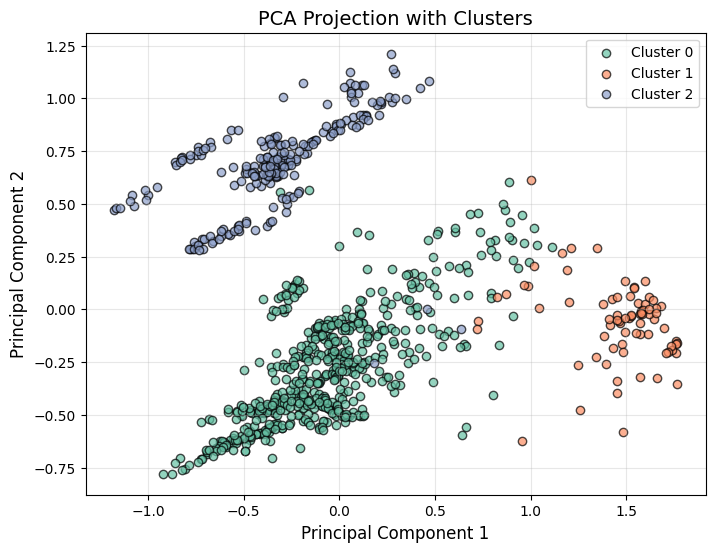

Silhouette Score: 0.2519


In [153]:
k = 3
numlocal = 2
maxneighbor = 3

medoids, clusters = clarans(df, k, numlocal, maxneighbor)



cluster_colors = sns.color_palette("Set2", k)  

plt.figure(figsize=(8, 6))

for i, (cluster_name, indices) in enumerate(clusters.items()):
    cluster_points = data_2d[indices]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster_name}",
                color=cluster_colors[i], alpha=0.7, edgecolor='k')

plt.title('PCA Projection with Clusters', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()
def clusters_to_labels(clusters, n_points):
    labels = np.full(n_points, -1)  # Initialize with -1 (unassigned)
    for cluster_id, indices in clusters.items():
        labels[indices] = cluster_id  # Assign cluster IDs to the corresponding indices
    return labels

n_points = len(df)  # Total number of data points
labels = clusters_to_labels(clusters, n_points)

if len(set(labels)) > 1:
    sil_score = silhouette_score(df, labels)
    print(f"Silhouette Score: {sil_score:.4f}")
else:
    print("Cannot calculate silhouette score: Less than 2 clusters.")


In [154]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import numpy as np  # Ensure numpy is imported for array manipulations

# Initialize lists for results
silhouette_scores = []
results = []  # To store parameter combinations and their silhouette scores

# Define parameter ranges
k_values = range(2, 4)  # Testing for k = 2 to 3 for brevity
numlocal_range = range(2, 5)  # Range for numlocal
maxneighbor_range = range(2, 5)  # Range for maxneighbor
n_points = len(new_data)  # Assuming new_data is your input DataFrame

# Iterate through parameters
for numlocal in numlocal_range:
    for maxneighbor in maxneighbor_range:
        for k in k_values:
            # Run CLARANS algorithm
            medoids, clusters = clarans(new_data, k, numlocal, maxneighbor)
            
            # Convert clusters to labels
            labels = clusters_to_labels(clusters, n_points)
            
            # Compute Silhouette Score
            sil_score = silhouette_score(new_data, labels)
            silhouette_scores.append(sil_score)

            # Save parameters and their scores
            results.append({
                'k': k,
                'numlocal': numlocal,
                'maxneighbor': maxneighbor,
                'silhouette_score': sil_score
            })
            
            # Plot clusters if silhouette score is above a meaningful threshold
            if sil_score >= 0.5:  # Adjust threshold based on expected score range
                plt.figure(figsize=(8, 6))
                for i, (cluster_name, indices) in enumerate(clusters.items()):
                    cluster_points = new_data.iloc[indices].values  # Assuming new_data is a DataFrame
                    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                                label=f"Cluster {cluster_name}",
                                alpha=0.7, edgecolor='k')
                plt.title(f"Clusters for k={k}, numlocal={numlocal}, maxneighbor={maxneighbor}")
                plt.xlabel("Feature 1")
                plt.ylabel("Feature 2")
                plt.legend()
                plt.show()

# Find the best parameters
best_result = max(results, key=lambda x: x['silhouette_score'])

# Print the best parameters and corresponding silhouette score
print(f"Best Parameters: k={best_result['k']}, numlocal={best_result['numlocal']}, "
      f"maxneighbor={best_result['maxneighbor']}")
print(f"Best Silhouette Score: {best_result['silhouette_score']}")

Best Parameters: k=3, numlocal=3, maxneighbor=3
Best Silhouette Score: 0.2626674689327871


Best Parameters: k=2, numlocal=4, maxneighbor=4
Best Silhouette Score: 0.21486662253094957


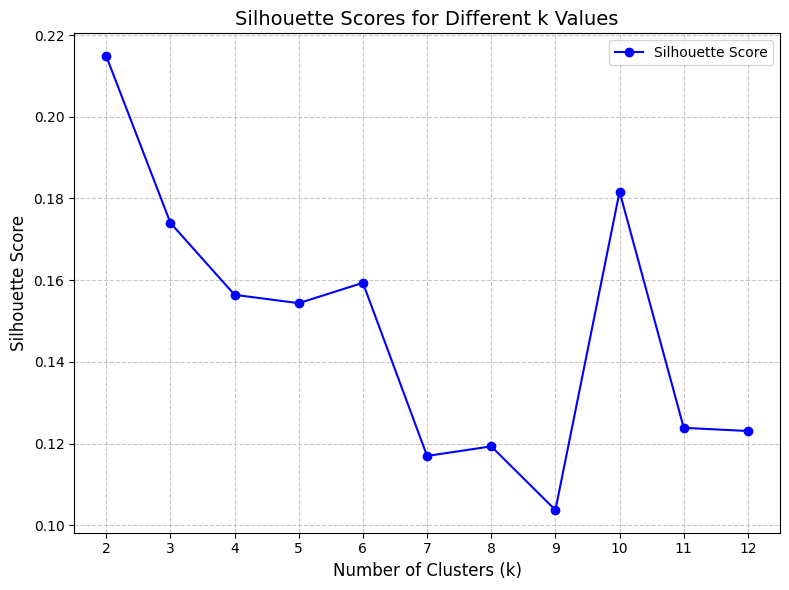

In [158]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import numpy as np  # Ensure numpy is imported for array manipulations

# Initialize lists for results
silhouette_scores = []
results = []  # To store parameter combinations and their silhouette scores

# Define parameter ranges
k_values = range(2, 13)  # Testing for k = 2 to 3 for brevity

n_points = len(new_data)  # Assuming new_data is your input DataFrame

# Iterate through parameters

for k in k_values:
    # Run CLARANS algorithm
    medoids, clusters = clarans(new_data, k, numlocal, maxneighbor)
    
    # Convert clusters to labels
    labels = clusters_to_labels(clusters, n_points)
    
    # Compute Silhouette Score
    sil_score = silhouette_score(new_data, labels)
    silhouette_scores.append(sil_score)

    # Save parameters and their scores
    results.append({
        'k': k,
        'numlocal': numlocal,
        'maxneighbor': maxneighbor,
        'silhouette_score': sil_score
    })
    
    # Plot clusters if silhouette score is above a meaningful threshold
        

# Find the best parameters
best_result = max(results, key=lambda x: x['silhouette_score'])

# Print the best parameters and corresponding silhouette score
print(f"Best Parameters: k={best_result['k']}, numlocal={best_result['numlocal']}, "
      f"maxneighbor={best_result['maxneighbor']}")
print(f"Best Silhouette Score: {best_result['silhouette_score']}")

plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='b', label='Silhouette Score')
plt.title("Silhouette Scores for Different k Values", fontsize=14)
plt.xlabel("Number of Clusters (k)", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)
plt.xticks(k_values)  # Ensure x-axis ticks match k values
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()



In [151]:
eps = 0.6  # Maximum neighborhood distance
min_samples = 50  # Minimum points to form a cluster

Silhouette Score: -0.1029


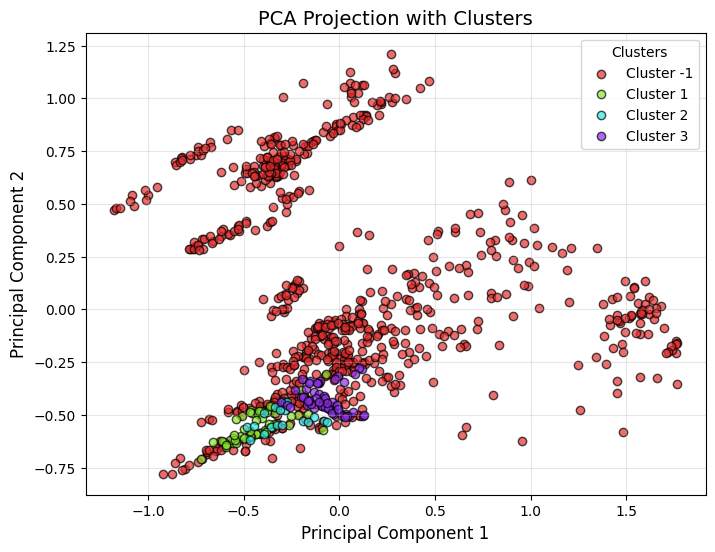

In [152]:
labels = dbscan(df, eps, min_samples)


# Combine PCA-transformed data with clusters
pca_data_with_clusters = pd.DataFrame(data_2d, columns=["PCA1", "PCA2"])
pca_data_with_clusters["Cluster"] = labels

# Plot clusters
plt.figure(figsize=(8, 6))
unique_clusters = pca_data_with_clusters["Cluster"].unique()

num_clusters = len(unique_clusters)

# Assign distinct colors to clusters
colors = [mcolors.hsv_to_rgb((i / num_clusters, 0.8, 0.9)) for i in range(num_clusters)]

# Loop through unique clusters and plot
for i, cluster in enumerate(unique_clusters):
    cluster_points = pca_data_with_clusters[pca_data_with_clusters["Cluster"] == cluster]
    plt.scatter(cluster_points["PCA1"], cluster_points["PCA2"],
                label=f"Cluster {cluster}",
                color=colors[i],
                alpha=0.7,
                edgecolor='k')


if len(set(labels)) > 1:
    sil_score = silhouette_score(df, labels)
    print(f"Silhouette Score: {sil_score:.4f}")
else:
    print("Cannot calculate silhouette score: Less than 2 clusters.")




plt.title('PCA Projection with Clusters', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title="Clusters")
plt.grid(alpha=0.3)
plt.show()


Best Silhouette Score: 0.3434
Best Parameters: eps=1.98, min_samples=1


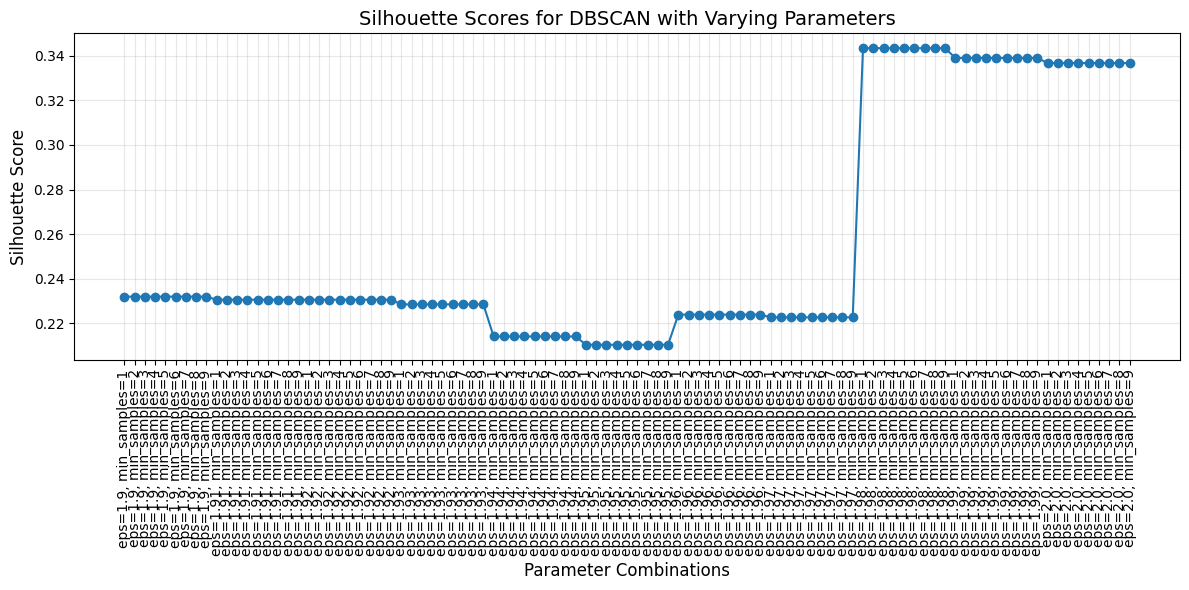

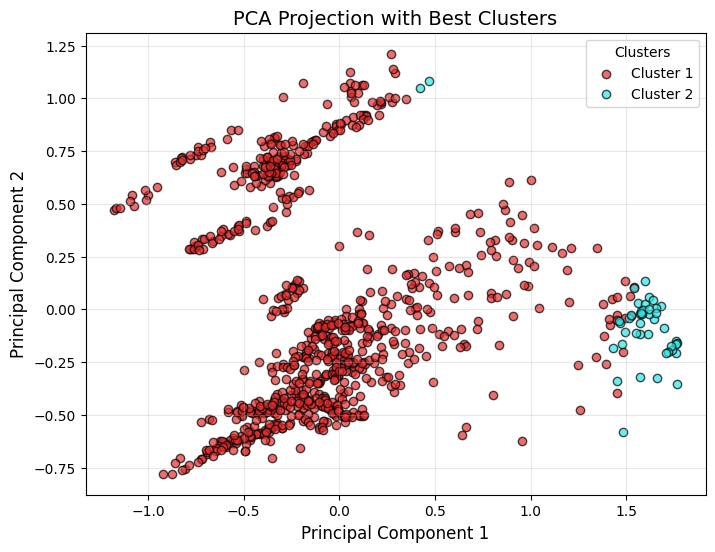

In [140]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Define the parameter grid
eps_values = np.arange(1.9, 2.0, 0.01)  # Epsilon values to test
min_samples_values = np.arange(1, 10, 1)  # Min samples to test

best_sil_score = -1  # Initialize the best silhouette score
best_params = {}  # Initialize the best parameters
silhouette_scores = []  # To store all silhouette scores for visualization
parameter_combinations = []  # To track the tested parameter combinations

# Grid search over the parameters
for eps in eps_values:
    for min_samples in min_samples_values:
        # Apply DBSCAN
        labels = dbscan(df, eps=eps, min_samples=min_samples)  # Assuming `dbscan` is your custom implementation
        
        # Check if we have more than one cluster
        if len(set(labels)) > 1:
            # Calculate silhouette score
            sil_score = silhouette_score(df, labels)
            
            # Save the score and parameters
            silhouette_scores.append(sil_score)
            parameter_combinations.append((eps, min_samples))
            
            # Update the best score and parameters if applicable
            if sil_score > best_sil_score:
                best_sil_score = sil_score
                best_params = {'eps': eps, 'min_samples': min_samples}

# Print the best parameters and silhouette score
print(f"Best Silhouette Score: {best_sil_score:.4f}")
print(f"Best Parameters: eps={best_params['eps']}, min_samples={best_params['min_samples']}")

# Plot Silhouette Scores for each parameter combination
x_labels = [f"eps={eps}, min_samples={ms}" for eps, ms in parameter_combinations]
plt.figure(figsize=(12, 6))
plt.plot(range(len(silhouette_scores)), silhouette_scores, marker='o')
plt.xticks(range(len(silhouette_scores)), x_labels, rotation=90)
plt.title("Silhouette Scores for DBSCAN with Varying Parameters", fontsize=14)
plt.xlabel("Parameter Combinations", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Apply DBSCAN with the best parameters for visualization
labels = dbscan(df, eps=best_params['eps'], min_samples=best_params['min_samples'])

# PCA transformation for 2D visualization
pca = PCA(n_components=2)
data_2d = pca.fit_transform(df)

# Combine PCA-transformed data with clusters
pca_data_with_clusters = pd.DataFrame(data_2d, columns=["PCA1", "PCA2"])
pca_data_with_clusters["Cluster"] = labels

# Plot the best clustering
plt.figure(figsize=(8, 6))
unique_clusters = pca_data_with_clusters["Cluster"].unique()
num_clusters = len(unique_clusters)

# Assign distinct colors to clusters
colors = [mcolors.hsv_to_rgb((i / max(num_clusters, 1), 0.8, 0.9)) for i in range(num_clusters)]

# Loop through unique clusters and plot
for i, cluster in enumerate(unique_clusters):
    cluster_points = pca_data_with_clusters[pca_data_with_clusters["Cluster"] == cluster]
    plt.scatter(cluster_points["PCA1"], cluster_points["PCA2"],
                label=f"Cluster {cluster}",
                color=colors[i],
                alpha=0.7,
                edgecolor='k')

plt.title('PCA Projection with Best Clusters', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title="Clusters")
plt.grid(alpha=0.3)
plt.show()
